### Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

pd.set_option("display.max_columns", 30)
sns.set_theme(style="whitegrid")

### Projekta sakne + datu ceļš

In [9]:
def find_project_root() -> Path:
    current = Path.cwd().resolve()
    for candidate in [current, *current.parents]:
        if (candidate / "Data").exists():
            return candidate
    raise RuntimeError("Nevar atrast projektu ar mapi 'Data'")

REPO_ROOT = find_project_root()
DATASET_PATH = Path("/Users/enijabrakse/datizrace-proj-1/Data/03 smoking and drinking/smoking_driking_dataset_Ver01.csv")
DATASET_PATH

PosixPath('/Users/enijabrakse/datizrace-proj-1/Data/03 smoking and drinking/smoking_driking_dataset_Ver01.csv')

### Datu ielāde

In [10]:
df = pd.read_csv(DATASET_PATH)
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


24 kolonnas: demogrāfija, ķermeņa mērījumi, veselības rādītāji un mērķi: SMK_stat_type_cd, kurš satur diskrētas vērtības (smēķētāju tips: 1 - nekad, 2 - vairs nē, 3 - jā, joprojām) un DRK_YN, kurš satur bināras vērtības (lieto alkoholu - Y vai nē - N). Nav dalījuma apmācības un testēšanas kopās.

### info

In [28]:
from io import StringIO

buffer = StringIO()
df.info(buf=buffer)
info_text = buffer.getvalue()

display(info_text)   # ja gribi redzēt oriģinālo izkārtojumu
info_df = (
    df.dtypes
      .to_frame(name="dtype")
      .assign(non_null=df.notna().sum(), nulls=df.isna().sum())
)
info_df


"<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 991346 entries, 0 to 991345\nData columns (total 24 columns):\n #   Column            Non-Null Count   Dtype  \n---  ------            --------------   -----  \n 0   sex               991346 non-null  object \n 1   age               991346 non-null  int64  \n 2   height            991346 non-null  int64  \n 3   weight            991346 non-null  int64  \n 4   waistline         991346 non-null  float64\n 5   sight_left        991346 non-null  float64\n 6   sight_right       991346 non-null  float64\n 7   hear_left         991346 non-null  float64\n 8   hear_right        991346 non-null  float64\n 9   SBP               991346 non-null  float64\n 10  DBP               991346 non-null  float64\n 11  BLDS              991346 non-null  float64\n 12  tot_chole         991346 non-null  float64\n 13  HDL_chole         991346 non-null  float64\n 14  LDL_chole         991346 non-null  float64\n 15  triglyceride      991346 non-null  float64\n 16

,dtype,non_null,nulls
sex,object,991346,0
age,int64,991346,0
height,int64,991346,0
weight,int64,991346,0
waistline,float64,991346,0
sight_left,float64,991346,0
sight_right,float64,991346,0
hear_left,float64,991346,0
hear_right,float64,991346,0
SBP,float64,991346,0


Tātad 991 346 ieraksti un 24 kolonnas. Dzimums un DRK_YN ir objektu tips (kvalitatīvi atribūti), pārējās kolonnas ir skaitliskas (kvantitatīvi atribūti) - 19 float (peldošā komata) un 3 veselo skaitļu kolonnas (vecums, garums un svars). Kolonna SMK_stat_type_cd būtībā ir kategoriska jeb diskrēta (1(never), 2(used to smoke but quit), 3(still smoke)), bet dati ir peldošā komata (float). Tāpat ir ar urine_protein kolonnu (1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)); un dzirdes kolonnām labajai un kreisajai ausij (1(normal),2(abnormal)). Tātad šīs peldošā komata vērtības būs jāpārveido kategoriskās jeb jādiskritizē. Visām kolonnām non_null = rindu skaits (991 346), tātad jau redzams, ka nav trūkstošo vērtību.

### Trūkstošās vērtības

In [12]:
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

display(missing_counts.to_frame(name="Missing"))
display(missing_pct.to_frame(name="Missing %"))

,Missing
sex,0
age,0
SMK_stat_type_cd,0
gamma_GTP,0
SGOT_ALT,0
SGOT_AST,0
serum_creatinine,0
urine_protein,0
hemoglobin,0
triglyceride,0


,Missing %
sex,0.0
age,0.0
SMK_stat_type_cd,0.0
gamma_GTP,0.0
SGOT_ALT,0.0
SGOT_AST,0.0
serum_creatinine,0.0
urine_protein,0.0
hemoglobin,0.0
triglyceride,0.0


Redzamas divas tabulas priekš trūkstošo vērtību skaita un procentuāli (%). Taču visi rādītāji ir 0, tātad nav jāapstrādā trūkstošās vērtības.

### Kolonnu saraksti

In [13]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
categorical_cols = df.select_dtypes(include="object").columns.tolist()

print(f"Skaitlisko kolonnu skaits: {len(numeric_cols)}")
print(numeric_cols)
print()
print(f"Kategoriju kolonnu skaits: {len(categorical_cols)}")
print(categorical_cols)

Skaitlisko kolonnu skaits: 22
['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']

Kategoriju kolonnu skaits: 2
['sex', 'DRK_YN']


Redzams, ka skaitliskās kolonnas ir 22 un kategoriskās ir 2. 4 no skaitliskajām kolonnām (hear_left, hear_right, urine_protein un SMK_stat_type_cd) būs jāpārveido kategoriskās.

### Skaitlisko kolonnu statistika

In [29]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
for col in ["hear_left", "hear_right", "urine_protein", "SMK_stat_type_cd"]:
    if col in numeric_cols:
        numeric_cols.remove(col)

df[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0
BLDS,991346.0,100.424447,24.179960,25.0,88.0,96.0,105.0,852.0
tot_chole,991346.0,195.557020,38.660155,30.0,169.0,193.0,219.0,2344.0


Redzams, ka vecums ir no 20-85 gadiem, ar vidējo vecumu 45 gadi. Garuma Min: 130.0 cm, Max: 190.0 cm. Svara Min: 25.0 kg, Max: 140.0 kg. Vidukļa apkārtmēram (waistline) Min: 8.0 cm un Max: 999.0 cm norāda uz datu kļūdām/ outliers, kas būs jāapstrādā. Sight_left un sight_right (redze labajai un kreisajai acij) Min: 0.6, Max: 9.9. SBP Min: 67.0, Max: 273.0. DBP Min: 32.0, Max: 185.0. BLDS Min: 25.0, Max: 852.0. Tot_chole Min: 30.0, Max: 2344.0. HDL_chole Min: 1.0, Max: 8110.0. LDL_chole Min: 1.0, Max: 5119.0. Triglyceride Min: 1.0, Max: 9490.0. Hemoglobin Min: 1.0, Max: 25.0. Serum_creatinine Min: 0.1, Max: 98.0. SGOT_AST Min: 1.0, Max: 9999.0. SGOT_ALT Min: 1.0, Max: 7210.0. Gamma_GTP Min: 1.0, Max: 999.0. Gandrīz visiem atribūtiem ir izteikti lielas amplitūdas un augstas maksimumu vērtības.

### Kategoriju kolonnas

In [35]:
categorical_cols = ["sex", "DRK_YN", "SMK_stat_type_cd", "urine_protein", "hear_left", "hear_right"]
for col in categorical_cols:
    display(df[col].value_counts(dropna=False).head(5).to_frame(name=col))

,sex
sex,
Male,526415
Female,464931


,DRK_YN
DRK_YN,
N,495858
Y,495488


,SMK_stat_type_cd
SMK_stat_type_cd,
1.0,602441
3.0,213954
2.0,174951


,urine_protein
urine_protein,
1.0,935175
2.0,30850
3.0,16405
4.0,6427
5.0,1977


,hear_left
hear_left,
1.0,960124
2.0,31222


,hear_right
hear_right,
1.0,961134
2.0,30212


Vīrīešu daudzums ir nedaudz lielāks, nekā sieviešu daudzums. DRK_YN (lieto alkoholu vai nē) ir diezgan balansā - abi ir līdzīgi daudzumi. SMK_stat_type_cd visvairāk ir to respondentu, kas nekad nav smēķējuši, bet līdzīgā daudzumā ir tie, kas smēķēšanu ir atmetuši un tie, kas joprojām smēķē. Urine_protein visvairāk respondenti atbilst 1. kategorijai, kas pakāpeniski ir mazāk līdz 5. kategorijai. Dzirdes kolonnām normāla dzirde ir vidēji 3 reizes vairāk respondentu, nekā ārpus normas.

### Vizualizācijas

#### Histogrammas

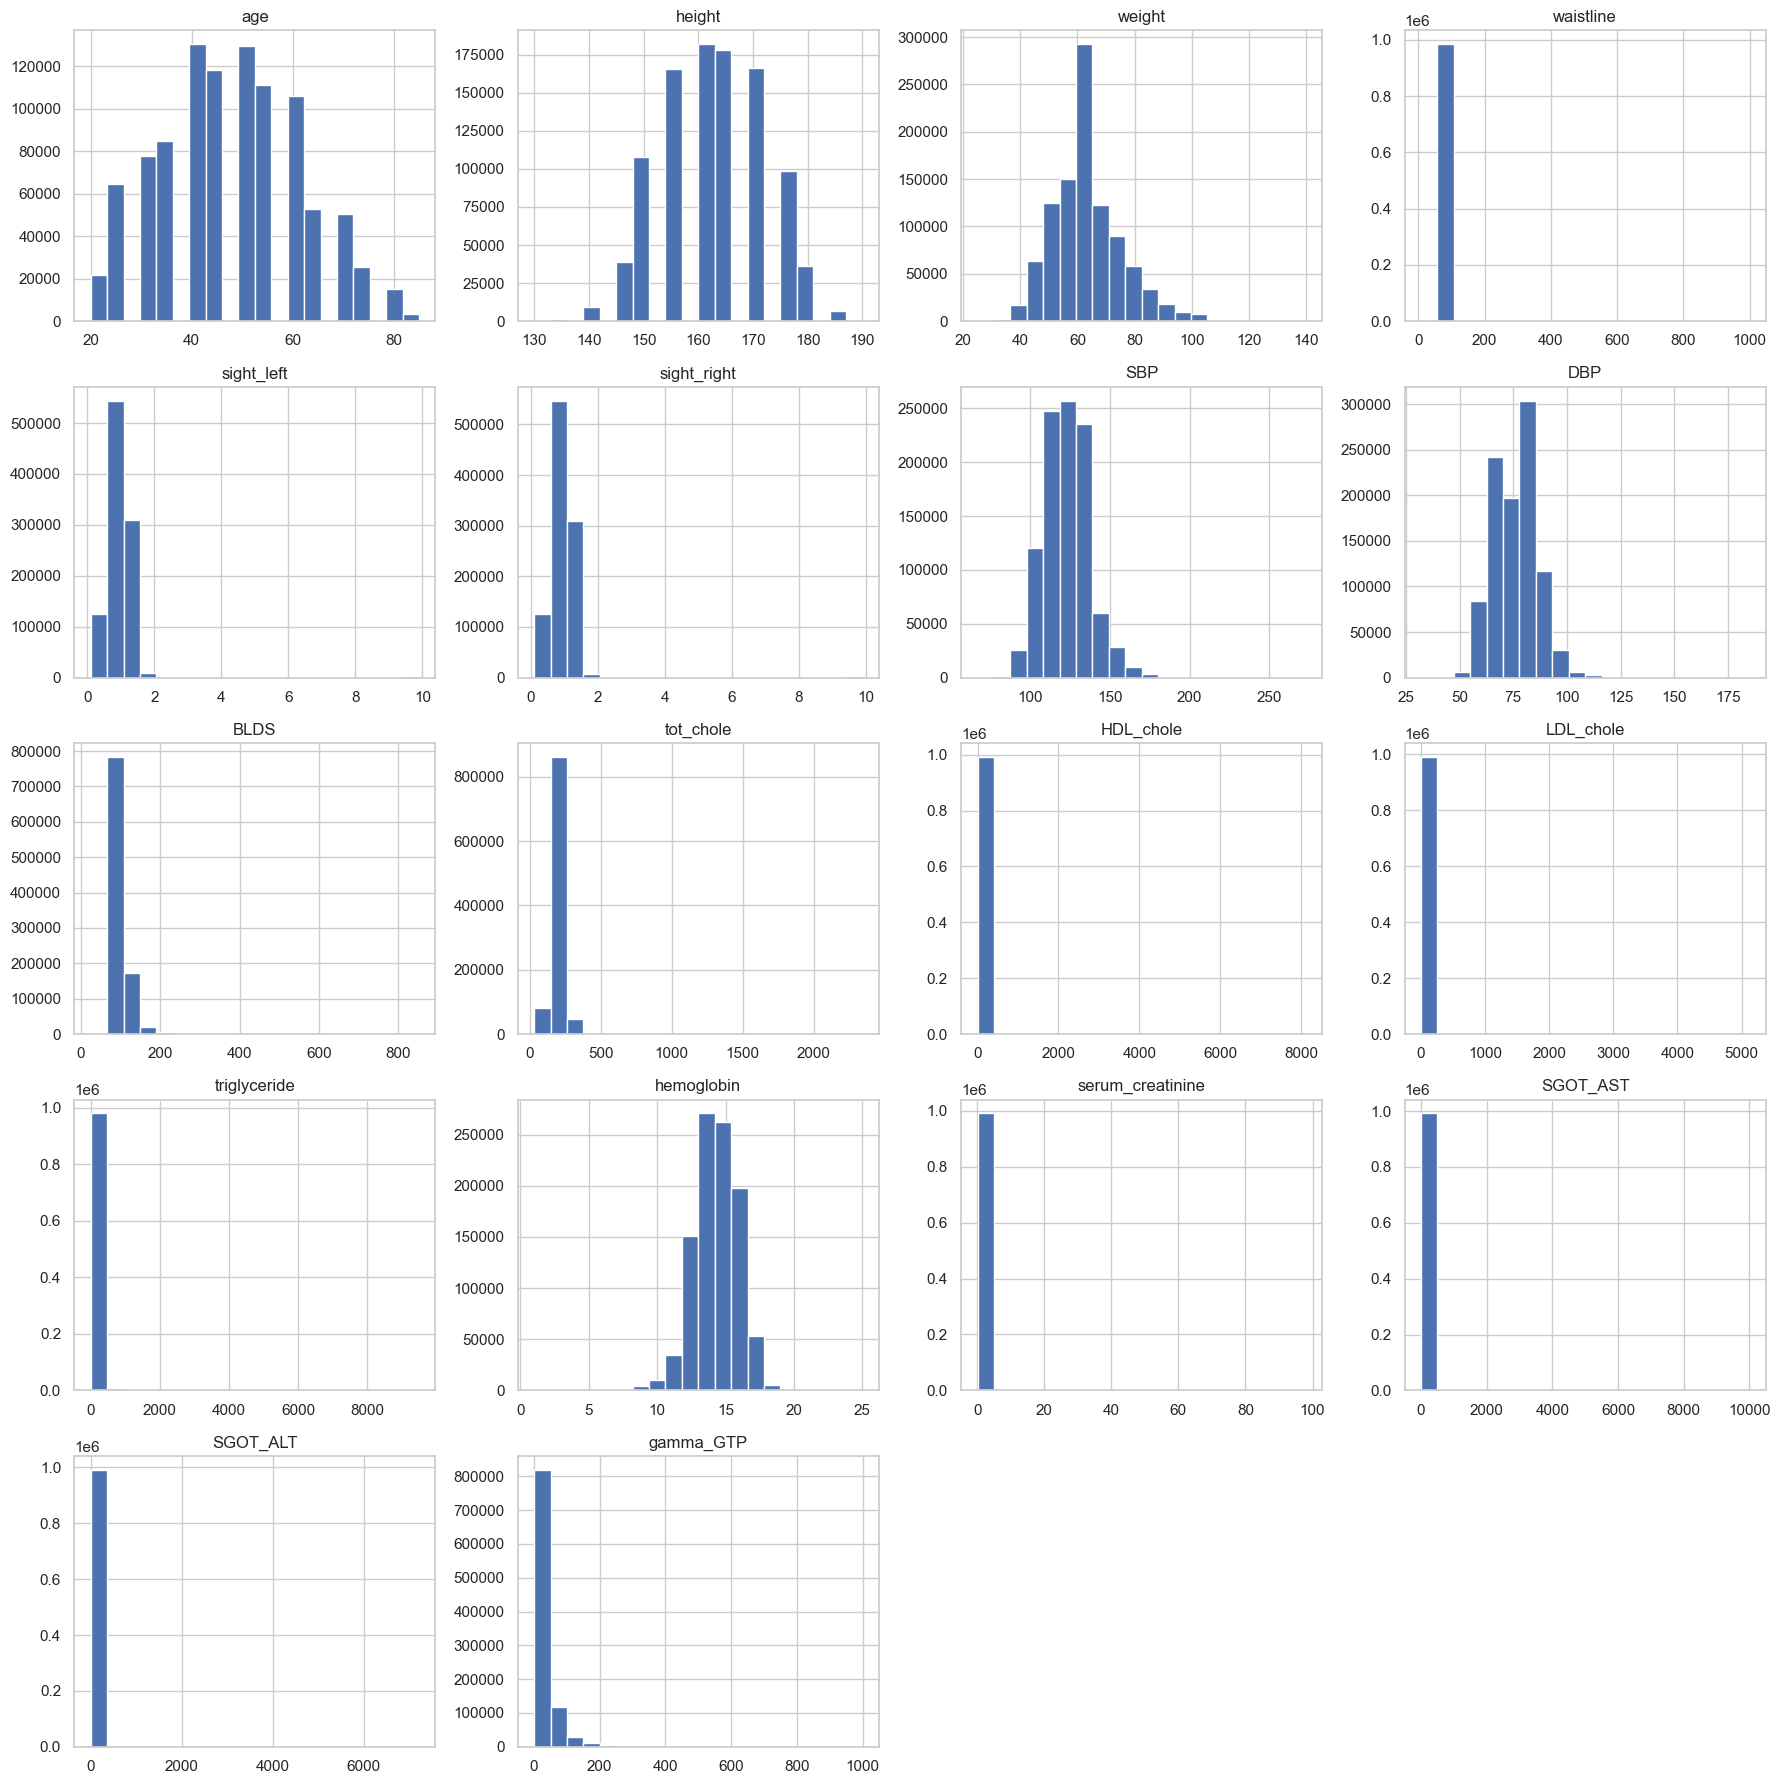

In [36]:
_ = df[numeric_cols].hist(bins=20, figsize=(18, 18))
plt.tight_layout()

#### Boxplot

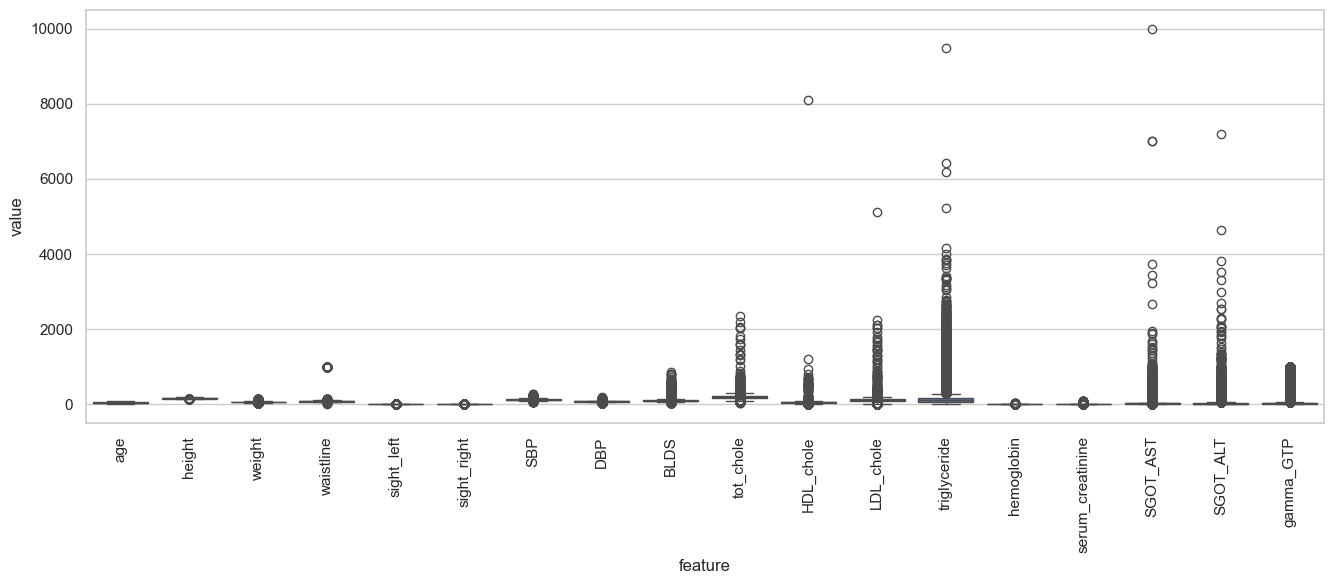

In [40]:
melted = df[numeric_cols].melt(var_name="feature", value_name="value")
plt.figure(figsize=(max(12, len(numeric_cols) * 0.75), 6))
sns.boxplot(data=melted, x="feature", y="value")
plt.xticks(rotation=90)
plt.tight_layout()

Waistline, HDL_chole, LDL_chole, triglyceride, SGOT_AST, SGOT_ALT mērījumi satur retas, ļoti lielas vērtības. Tātad, noteikti nepieciešama outlier apstrāde.

#### Korelāciju matrica

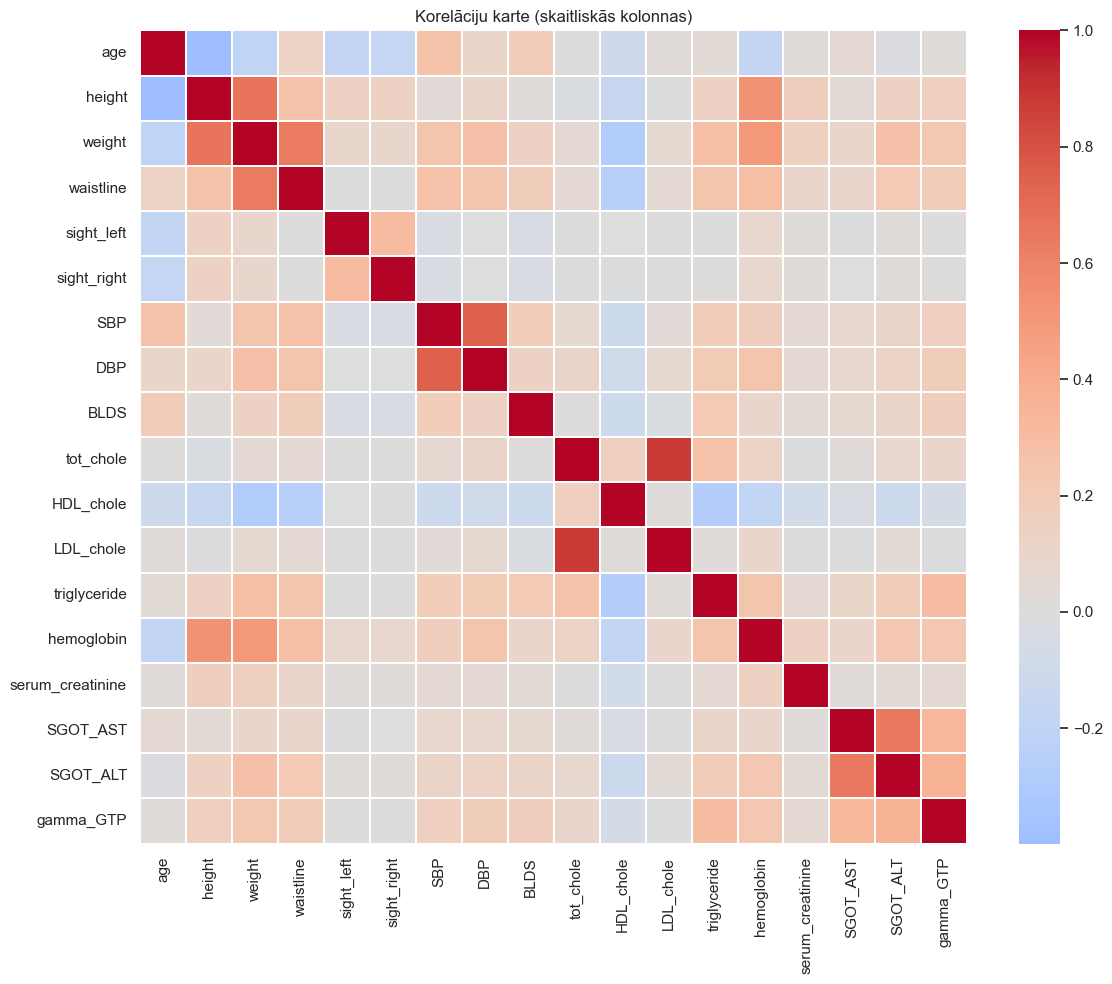

In [39]:
plt.figure(figsize=(12, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.3)
plt.title("Korelāciju karte (skaitliskās kolonnas)")
plt.tight_layout()

Lielākās korelācijas starp: height un weight, waistline un weight, SBP un DBP, LDL_chole un tot_chole, SGOT_AST ar SGOT_ALT, height un hemoglobin, weight un hemoglobin.

#### Countplot

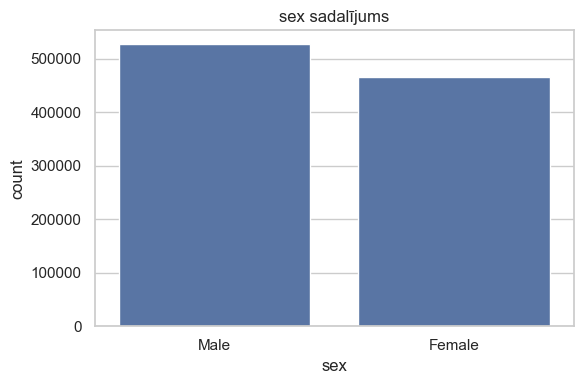

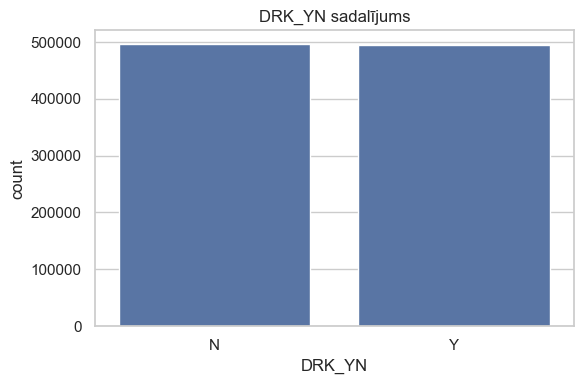

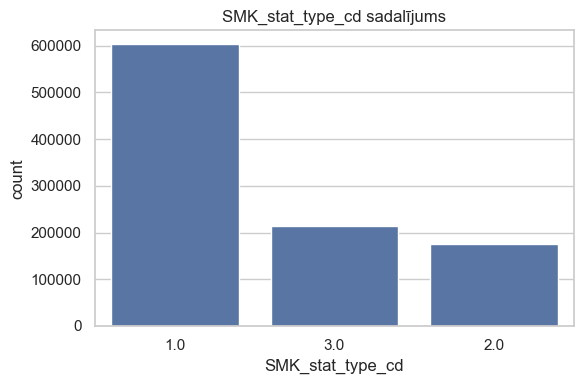

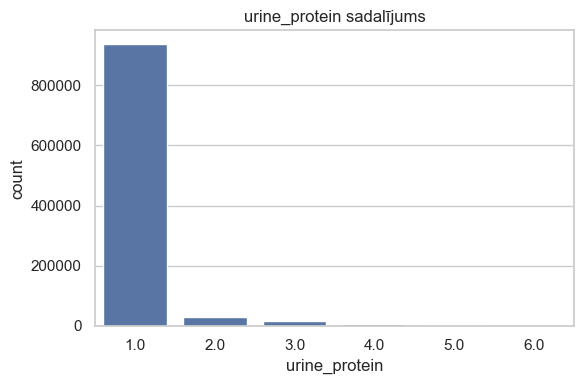

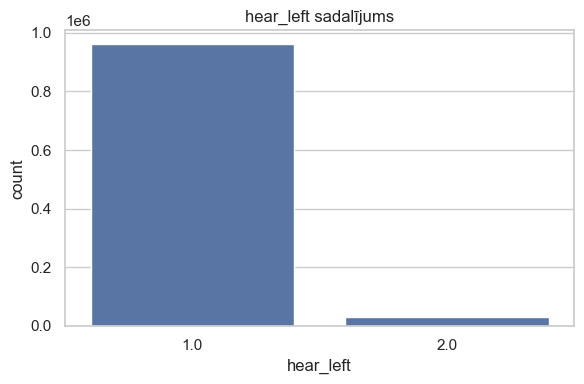

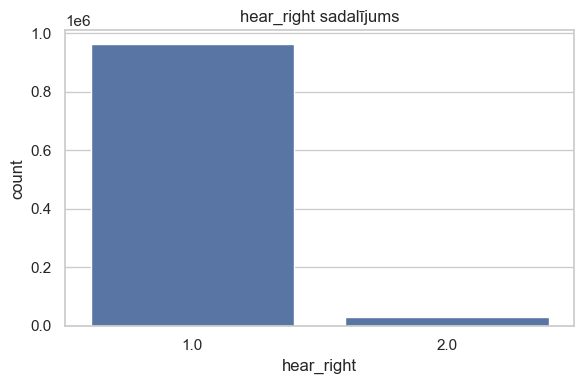

In [ ]:
TARGET_COLS = [col for col in ["sex", "DRK_YN", "SMK_stat_type_cd", "urine_protein", "hear_left", "hear_right"] if col in df.columns]
for col in TARGET_COLS:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"{col} sadalījums")
    plt.tight_layout()

#### Pairplot piemērs

Text(0.5, 1.02, 'Pairplot DRK_YN griezumā')

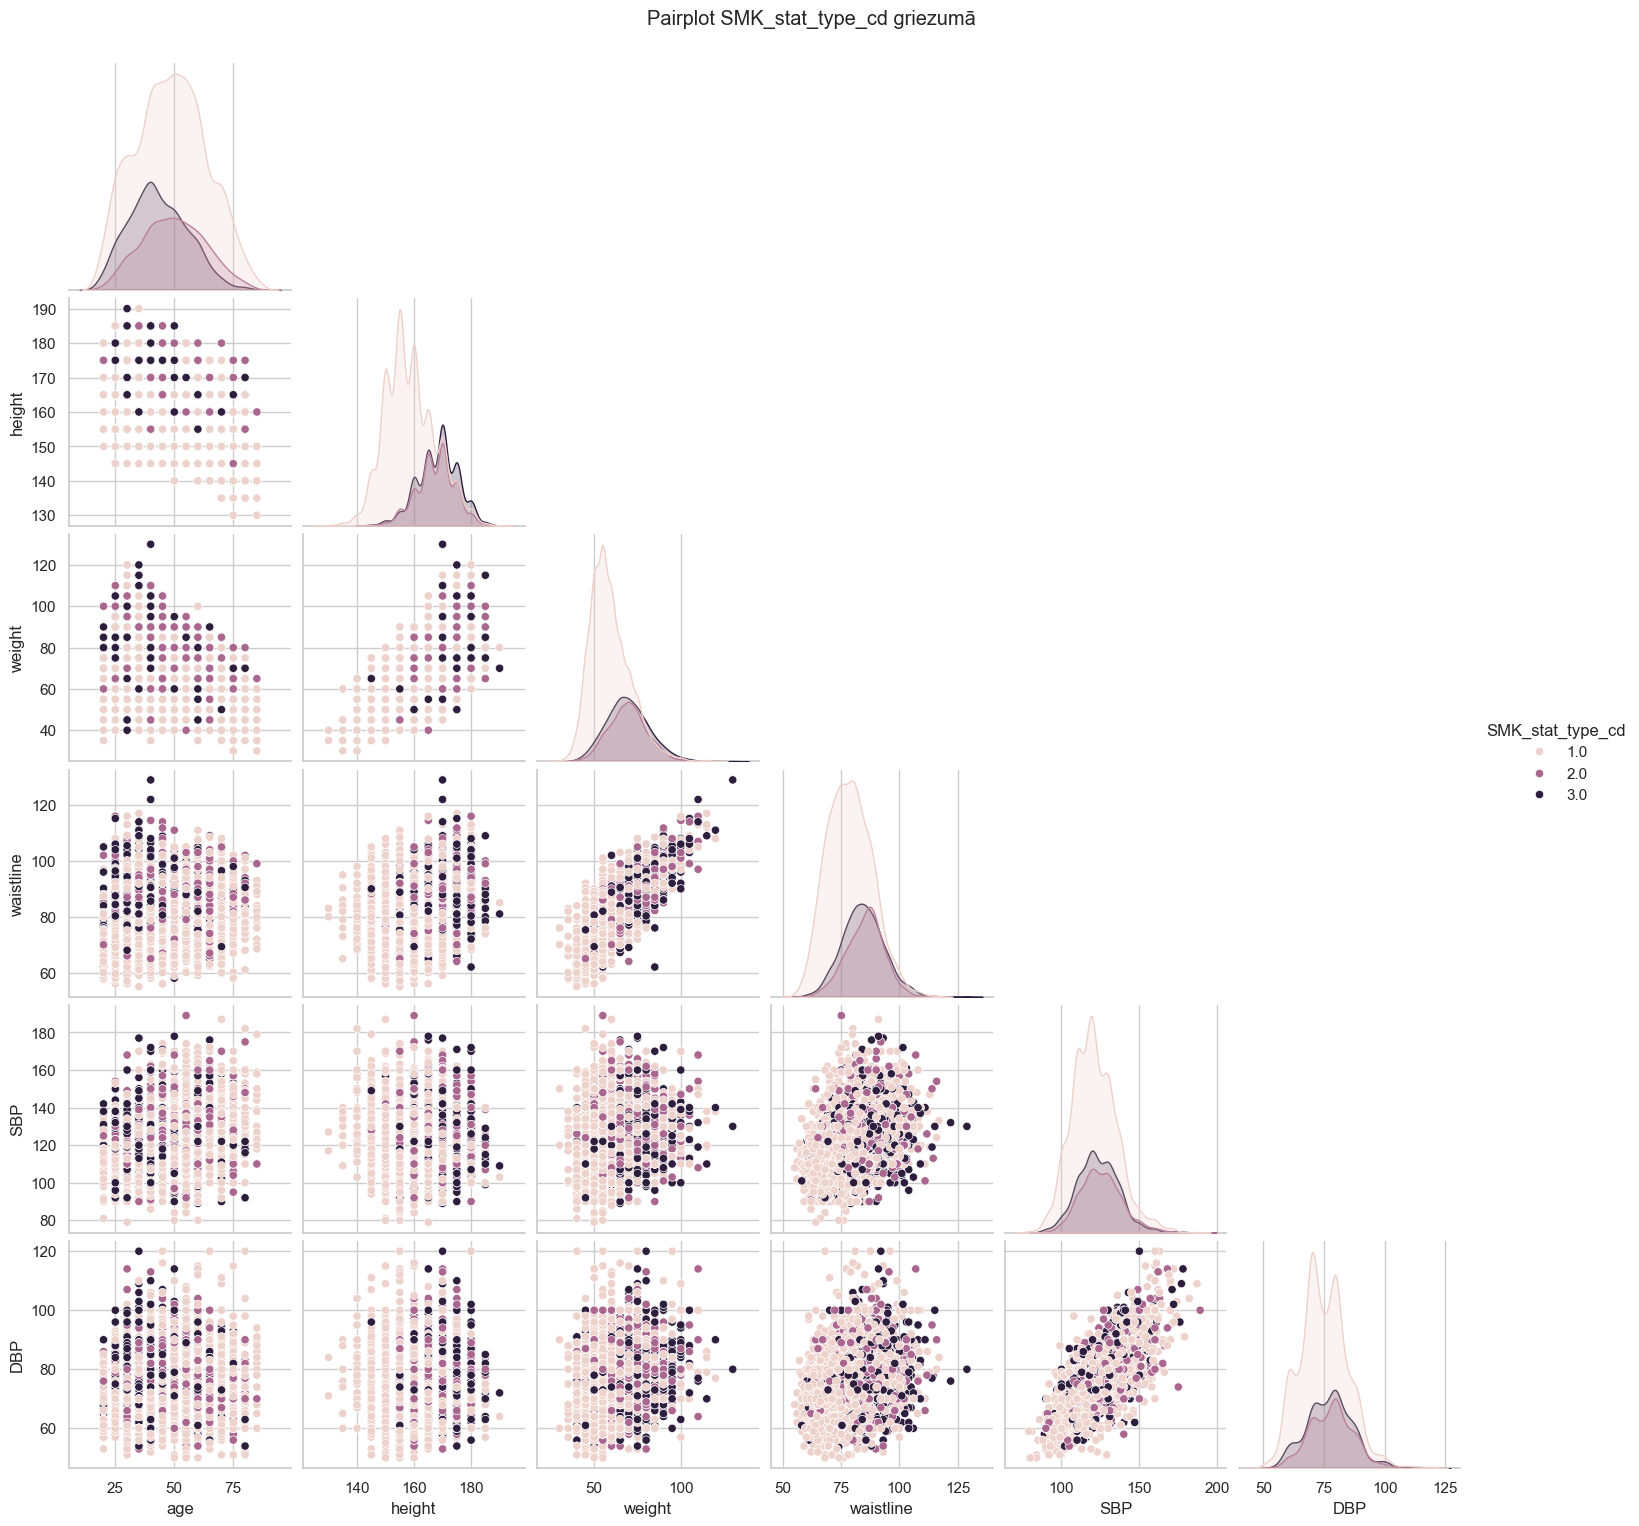

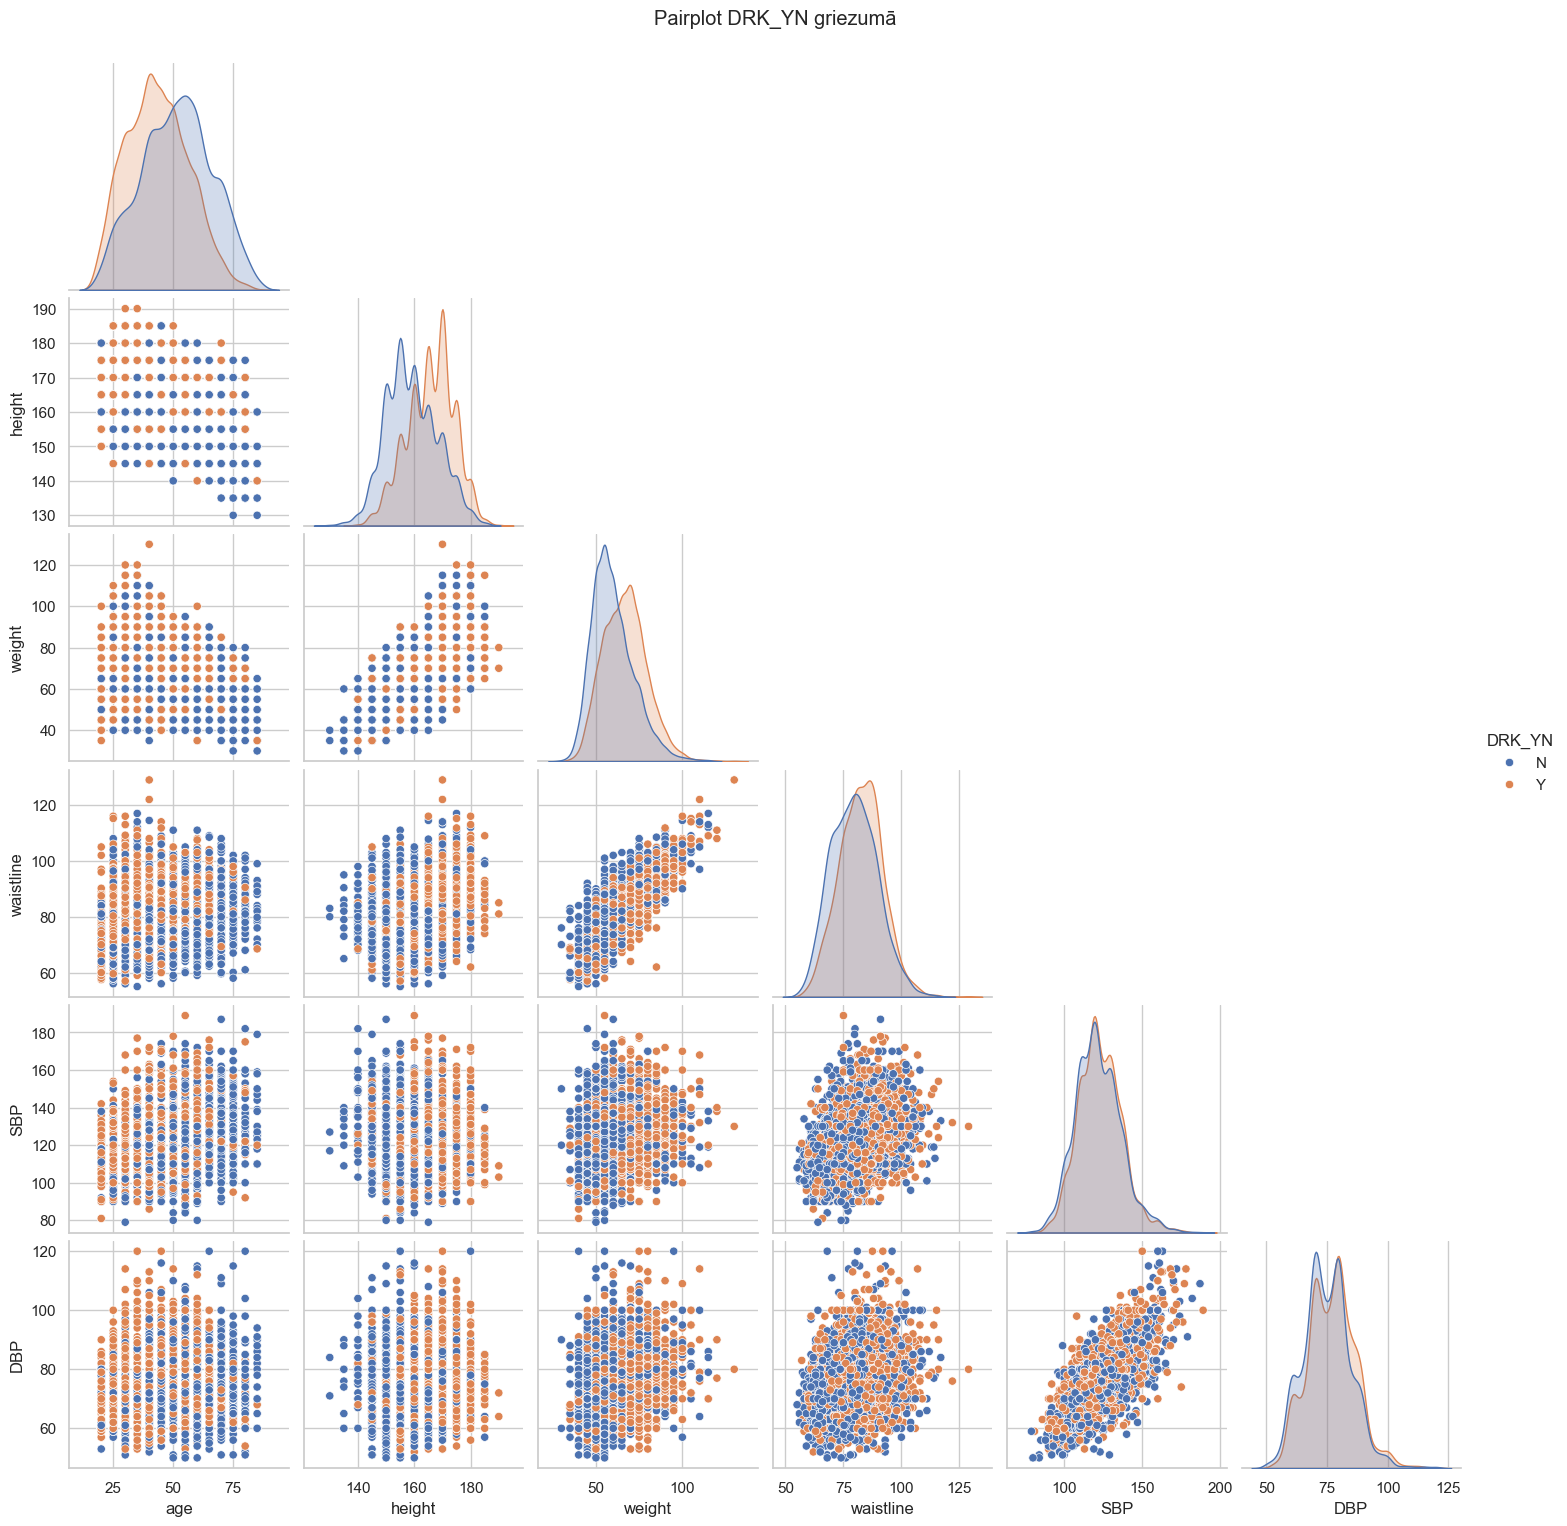

In [ ]:
FEATURES = [col for col in ["age", "height", "weight", "waistline", "SBP", "DBP"] if col in df.columns]
SAMPLE_SIZE = min(5000, len(df))
df_sample = df.sample(n=SAMPLE_SIZE, random_state=42)
sns.pairplot(df_sample, vars=FEATURES, hue="SMK_stat_type_cd", corner=True)
plt.suptitle("Pairplot SMK_stat_type_cd griezumā", y=1.02)

sns.pairplot(df_sample, vars=FEATURES, hue="DRK_YN", corner=True)
plt.suptitle("Pairplot DRK_YN griezumā", y=1.02)

Tā kā ir iespējami 2 mērķa atribūti, tiks notebook izveidoti modeļi abiem, salīdzināti rezultāti un izvēlēts viens.